# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merge_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
mice_count = merge_df["Mouse ID"].count()
mice_count

1893

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
mice_count = merge_df["Mouse ID"].count()
mice_count

1893

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_num = clean_df["Mouse ID"].unique()
mice_count = len(mice_num)
mice_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().map('{:.2f}'.format)
median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().map('{:.2f}'.format)
var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().map('{:.2f}'.format)
stddev = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().map('{:.2f}'.format)
sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Standard Deviation": stddev, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

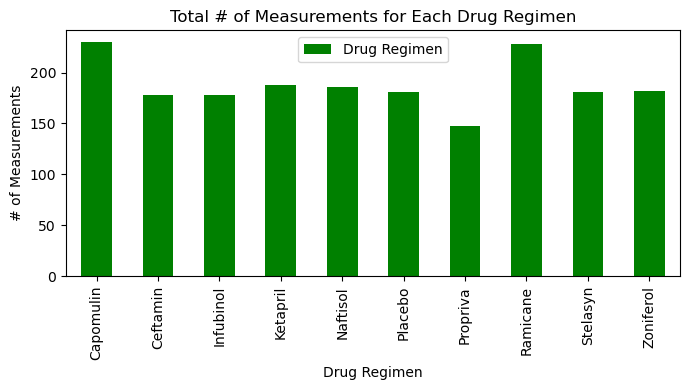

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grouped_drug = clean_df.groupby("Drug Regimen")
drug_count = pd.DataFrame(grouped_drug["Drug Regimen"].count())
drug_bar = drug_count.plot(kind='bar', color="green", figsize=(7,4))
plt.title("Total # of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Measurements")
plt.tight_layout()
plt.show()

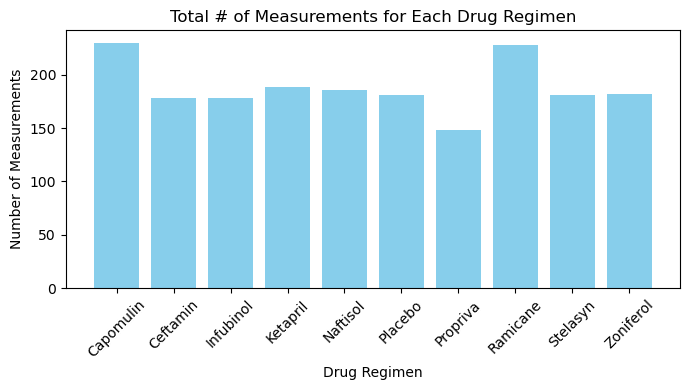

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

sizes = drug_count["Drug Regimen"]  # The sizes of each bar
labels = list(drug_count.index)      # The labels for each bar

plt.figure(figsize=(7, 4))
plt.bar(labels, sizes, color='skyblue')  # Create bar chart
plt.title("Total # of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")  # Label for the x-axis
plt.ylabel("Number of Measurements")  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


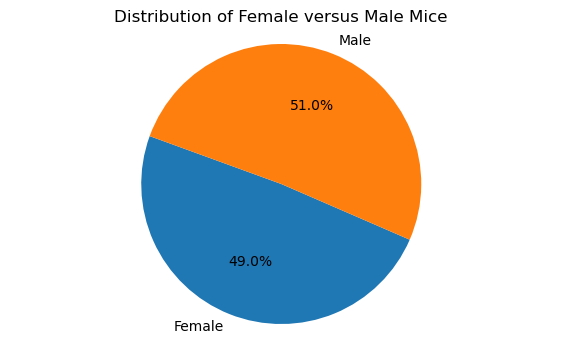

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_group = clean_df.groupby('Sex')
# gender_count = pd.DataFrame(gender_group['Mouse ID'].nunique())
gender_count = pd.DataFrame(gender_group['Sex'].count())
# gender_count.head()
# Get the unique mice with their gender
gender_count = pd.DataFrame(gender_group['Mouse ID'].nunique())
gender_count = pd.DataFrame(gender_group['Sex'].count())
# Make the pie chart
gender_labels = list(gender_count.index.values)
gender_values = gender_count['Sex']

plt.figure(figsize=(7,4))
plt.pie(gender_values, labels=gender_labels, startangle=160, autopct='%1.1f%%',)

plt.title("Distribution of Female versus Male Mice")
plt.axis('equal')
plt.show()

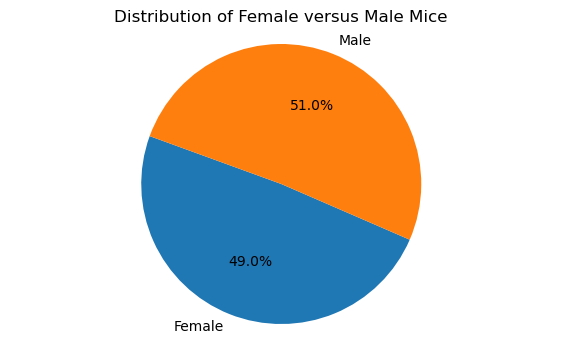

(-1.0999734448210907,
 1.0999987351112839,
 -1.099972742981056,
 1.0999986978844385)

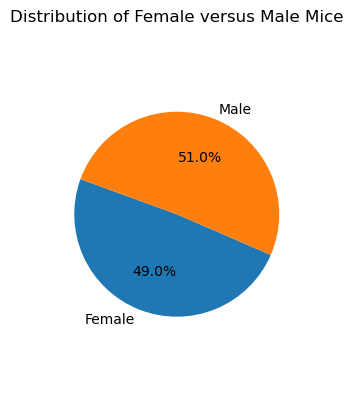

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_labels = list(gender_count.index.values)
gender_values = gender_count['Sex']

plt.figure(figsize=(7,4))
plt.pie(gender_values, labels=gender_labels, startangle=160, autopct='%1.1f%%',)

plt.title("Distribution of Female versus Male Mice")
plt.axis('equal')
plt.show()

# Make the pie chart
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.pie(gender_values, labels=gender_labels, startangle=160, autopct='%1.1f%%')
plt.title("Distribution of Female versus Male Mice")
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
finaltvol = clean_df.groupby(["Mouse ID"])['Timepoint'].max().reset_index()
finaltvol

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedata = finaltvol.merge(clean_df,on=['Mouse ID','Timepoint'], how="left")
mergedata.head(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen: 

        # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol_= mergedata.loc[mergedata['Drug Regimen'] == drug, "Tumor Volume (mm3)"]
    final_tumor_volume_list.append(final_tumor_vol_) 
    


    quartiles = final_tumor_vol_.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    Iqr=upperq-lowerq
    lower_limit=lowerq-(1.5*Iqr)
    upperq_limit=upperq+(1.5*Iqr)
    outliers=final_tumor_vol_.loc[(final_tumor_vol_<lower_limit)|(final_tumor_vol_>upperq_limit)]
    print(outliers) 

    # add subset


    # Determine outliers using upper and lower bounds


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [21]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


C:\Users\dileb\AppData\Local\Temp\ipykernel_12308\3949873104.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(final_tumor_volume_list, labels= regimen)


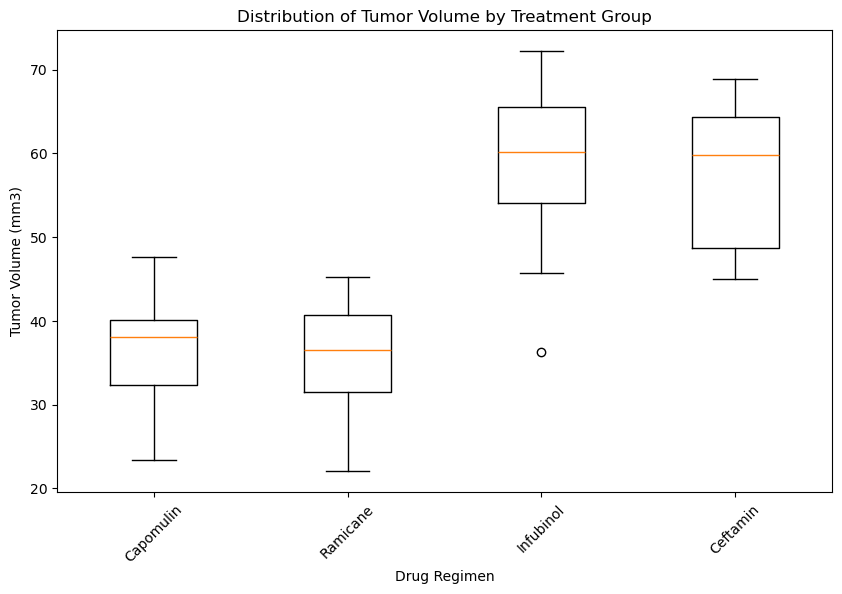

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# merged_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# treatment_groups = merged_data.groupby('Drug Regimen')
# treatment_volumes = [data['Tumor Volume (mm3)'] for _, data in treatment_groups]

plt.figure(figsize=(10, 6))
plt.boxplot(final_tumor_volume_list, labels= regimen)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()

## Line and Scatter Plots

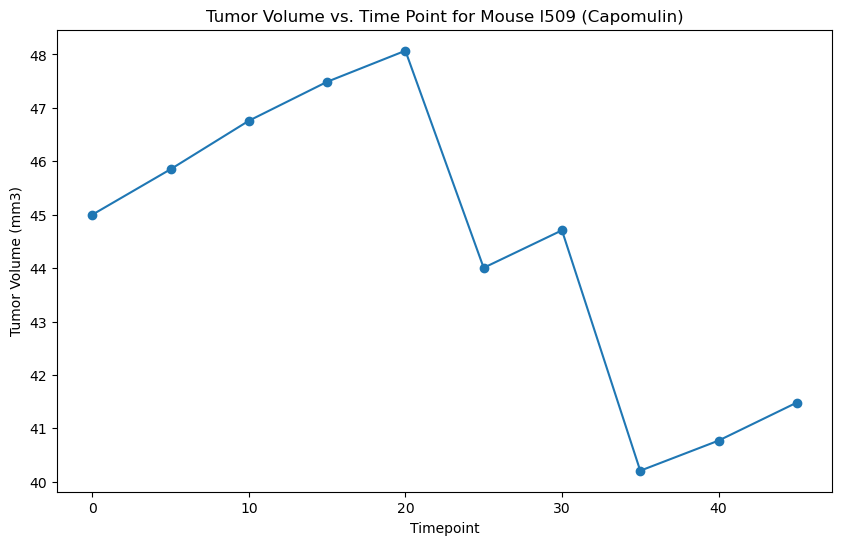

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
plt.figure(figsize=(10, 6))
plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs. Time Point for Mouse l509 (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

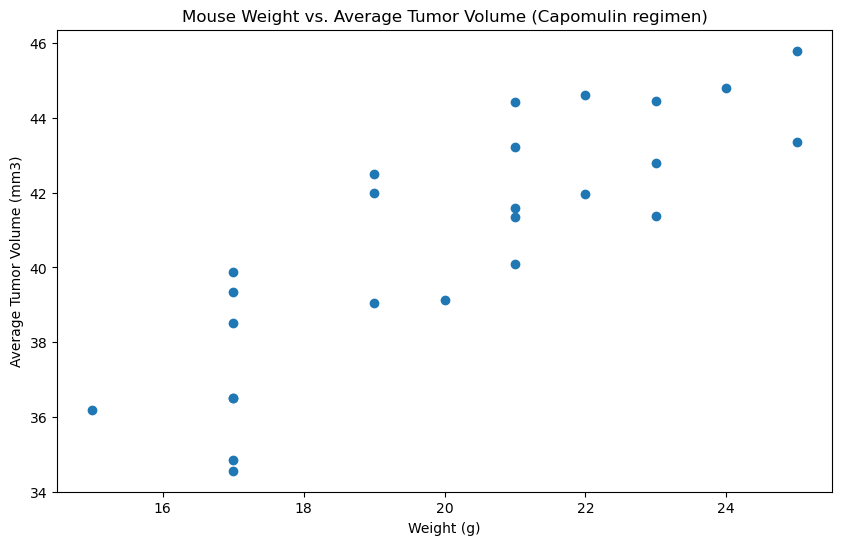

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Analyze Mouse Data
# def analyze_mouse_data(metadata_file, results_file):
#     # Load data
#     mouse_metadata = pd.read_csv(metadata_file)
#     study_results = pd.read_csv(results_file)
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_data[capomulin_data['Mouse ID'] == 'l509']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Correlation coefficient: 0.84


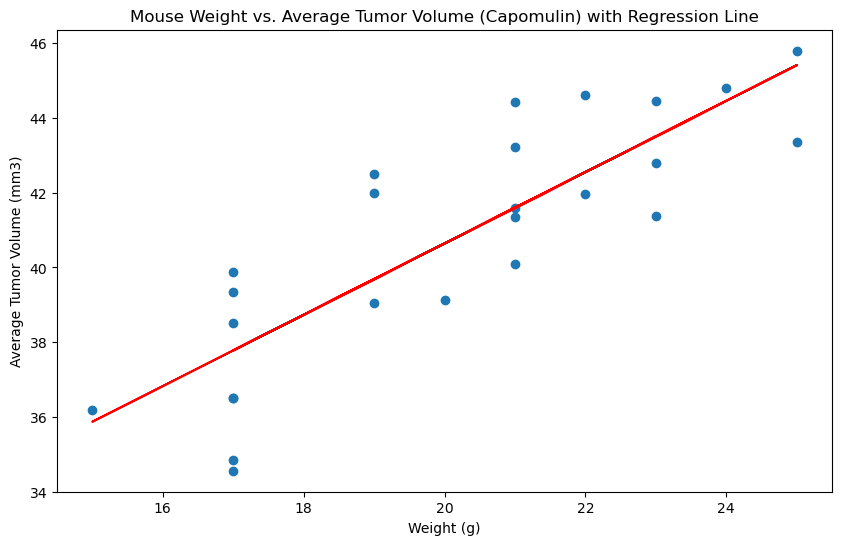

In [36]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
    # Correlation and linear regression
correlation = st.pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])[0]
print(f"Correlation coefficient: {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
regression_line = slope * avg_tumor_volume['Weight (g)'] + intercept

plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.plot(avg_tumor_volume['Weight (g)'], regression_line, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin) with Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()